In [95]:
from dotenv import dotenv_values
import dotenv
import pathlib
import os

from langchain.llms import OpenAI
from langchain.chat_models import ChatOpenAI
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.text_splitter import CharacterTextSplitter, RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma, Weaviate, Pinecone
from langchain.docstore.document import Document
from langchain.prompts import PromptTemplate
from langchain.indexes.vectorstore import VectorstoreIndexCreator
from langchain.document_loaders import PyPDFLoader, PyPDFDirectoryLoader

import pinecone

dotenv.load_dotenv(".env")
config = dotenv_values(".env")
OPENAI_KEY = config["OPENAI_API_KEY"]
WEVIATE_URL=config['WEAVIATE_URL']

In [36]:
# llm = OpenAI(openai_api_key=OPENAI_KEY, model='gpt-3.5-turbo')
# print(llm.predict("I am a business in the tech industry planning to open a branch in India. What are the relavant sustainability regulations I should be aware of?"))

In [137]:

# llm = ChatOpenAI(openai_api_key=OPENAI_KEY, model='gpt-3.5-turbo')
llm = ChatOpenAI(openai_api_key=OPENAI_KEY, model='gpt-4')

In [138]:
print(llm.predict("I am a business in the tech industry planning to open a branch in USA. What are the relavant sustainability regulations I should be aware of?"))

1. Environmental Protection Agency (EPA) Regulations: The EPA has numerous regulations that businesses, especially in the tech industry, must adhere to. These include regulations on waste disposal, air and water pollution, and the use of certain chemicals.

2. Energy Use Regulations: The Department of Energy (DOE) has various regulations on energy use and efficiency. If your business uses a significant amount of energy, you may need to comply with these regulations.

3. Occupational Safety and Health Administration (OSHA) Regulations: OSHA has regulations to ensure the safety and health of workers. These regulations may apply to your business, especially if you operate in a manufacturing capacity.

4. Electronic Waste Disposal: If your tech company produces electronic devices, you need to comply with the regulations on e-waste disposal. The specific regulations can vary from state to state.

5. Toxic Substances Control Act (TSCA): The TSCA gives EPA the authority to regulate new and ex

In [140]:
print(llm.predict('what are some actionable tasks i can do for my business related to sustainability regulations in the USA?'))

1. Understanding Regulations: Begin by familiarizing yourself with current sustainability regulations in the USA. These may include regulations on emissions, waste disposal, energy use, etc. 

2. Compliance Audit: Conduct a compliance audit to identify areas where your business may not be meeting sustainability regulations. This will help you prioritize what changes need to be made.

3. Implement Green Practices: Take steps to reduce your business's environmental impact. This could include recycling, conserving energy, using greener materials, etc.

4. Train Employees: Ensure your employees understand sustainability regulations and how they impact their roles. Train them on best practices for sustainability.

5. Develop a Sustainability Plan: Create a long-term plan to improve your business's sustainability. This could include setting goals for reducing waste, improving energy efficiency, etc.

6. Monitor Changes: Keep up-to-date with any changes in sustainability regulations. This wil

In [12]:
print(llm.predict("what are india's water pollution rules?"))

India has several regulations and laws in place to address water pollution. Some of the key rules and acts related to water pollution in India include:

1. Water (Prevention and Control of Pollution) Act, 1974: This act provides for the prevention and control of water pollution by establishing central and state pollution control boards. It outlines the powers and functions of these boards and sets guidelines for the prevention, control, and abatement of water pollution.

2. Environment (Protection) Act, 1986: This act empowers the central government to take necessary measures for protecting and improving the quality of the environment, including water resources. It provides for the regulation of discharge of pollutants into water bodies and sets standards for water quality.

3. Municipal Solid Wastes (Management and Handling) Rules, 2000: These rules focus on the management and handling of solid wastes to prevent their disposal into water bodies, which can cause pollution.

4. Biologic

# Parse pdfs

In [22]:
# data_folder = pathlib.Path('./assets/india')
# document_paths = [p for p in data_folder.iterdir() if p.is_file()]


In [63]:
# pages_all = []
# for p in document_paths:
#     loader = PyPDFLoader(p.__str__())
#     pages = loader.load_and_split()
#     pages_all.extend(pages)

In [120]:
loader = PyPDFDirectoryLoader('./assets/india/')
docs = loader.load_and_split(RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=20))
# docs = loader.load_and_split()

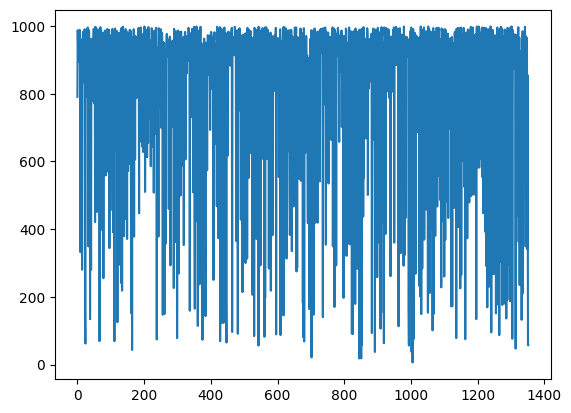

In [110]:
import matplotlib.pyplot as plt
plt.plot([len(p.page_content) for p in docs])

In [122]:
embeddings_model = OpenAIEmbeddings()

In [118]:
pinecone.init(
    api_key=os.getenv("PINECONE_API_KEY"),  # find at app.pinecone.io
    environment=os.getenv("PINECONE_ENV"),  # next to api key in console
)
index_name = "db-india"

# First, check if our index already exists. If it doesn't, we create it
if index_name not in pinecone.list_indexes():
    # we create a new index
    # dimension via openai embedding spec
    pinecone.create_index(name=index_name, metric="cosine", dimension=1536)


/Users/rohan/miniconda3/envs/hackathon/lib/python3.11/site-packages/pinecone/core/client/rest.py:45: DeprecationWarning: HTTPResponse.getheader() is deprecated and will be removed in urllib3 v2.1.0. Instead use HTTPResponse.headers.get(name, default).
  return self.urllib3_response.getheader(name, default)


In [121]:
# pinecone.Index(index_name).delete(delete_all=True)

{}

In [123]:
# db = Weaviate.from_documents(docs, embeddings_model, by_text=False)
db = Pinecone.from_documents(docs, embeddings_model, index_name=index_name)

In [132]:
query = "What does corporate social responsibility require me to do"
docs = db.similarity_search(query)

In [133]:
len(docs[0].page_content)

56

In [135]:
print(docs[1].page_content)

1GUIDANCE NOTE  
ON  
CORPORATE SOCIAL RESPONSIBILITY
INTRODUCTION
Augmenting profits is no longer the sole business performance indicator for the 
corporates and they have to play the role of responsible corporate citizens by 
undertaking activities for betterment of the society and the environment under 
the umbrella of Corporate Social Responsibility (CSR). 
Organisations use resources that belongs to the society and it is expected that 
they should operate in a sustainable manner and spend some amounts for 
preservation and sustainability of resources which belong to the society. 
Over the last two decades, significant economic growth and integration has 
taken place in the global economy, resulting in several changes in the way 
businesses operate. Governments across the world have been using different 
forms of regulations to improve corporate behavior so as to promote increased 
accountability, disclosures and transparency from them. Gone are the days when
